Normalization:

1. MinMax Scaling
2. Mean Normalization
3. Max Absolute Scaling
4. Robust Scaling

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
pd.set_option("display.max_rows", 8)
pd.set_option("display.max_columns", 4)
sns.set_style("darkgrid")
np.set_printoptions(threshold=10,precision=4, suppress=True)

to remove the effect of the changes made for the output will shows:

use:


pd.reset_option("all")

np.set_printoptions(threshold=np.inf)

In [25]:
df=pd.read_csv("wine_data.csv", usecols=[0,1,2])
df.columns=['Class_label', 'Alcohol', 'Malic_acid']



In [26]:
df

,Class_label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
...,...,...,...
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59
177,3,14.13,4.10


<Axes: xlabel='Alcohol', ylabel='Density'>

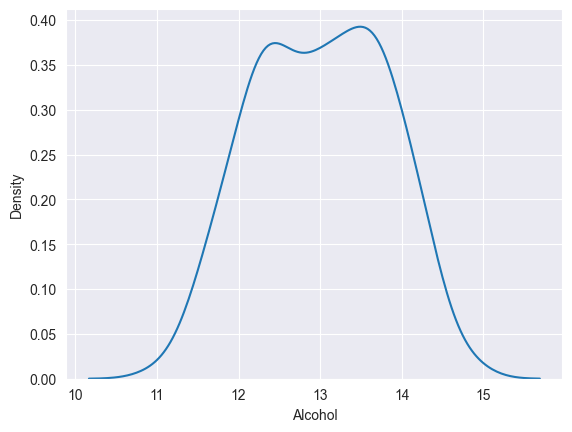

In [27]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic_acid', ylabel='Density'>

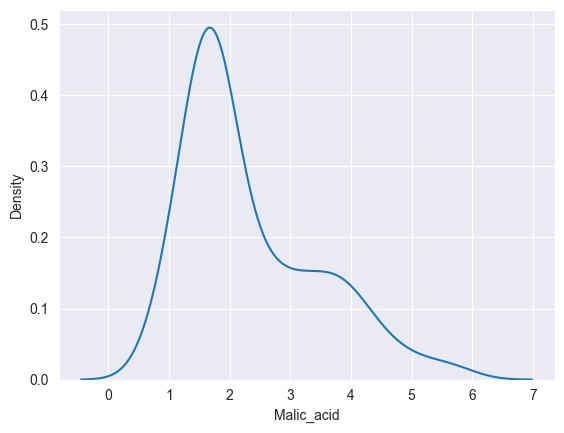

In [28]:
sns.kdeplot(df['Malic_acid'])


<Axes: xlabel='Alcohol', ylabel='Malic_acid'>

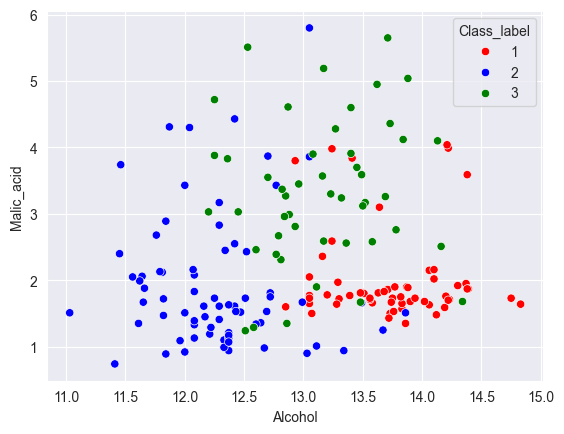

In [29]:
colorMap={1:'red', 2:'blue', 3:'green'}
sns.scatterplot(x=df['Alcohol'], y=df["Malic_acid"], hue=df['Class_label'], palette=colorMap)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [33]:
X_train, X_test, y_train, y_test= train_test_split(df.drop(labels='Class_label', axis=1), df['Class_label'], test_size=0.3, random_state=42, stratify=df['Class_label'])

In [34]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(124, 2) (54, 2) (124,) (54,)


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#fit the scaler to the train set and It will learn the parameters
scaler.fit(X_train)

#transform both the train and test sets
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [36]:
print(scaler.data_min_,
scaler.data_max_,
scaler.data_range_)

[11.03  0.74] [14.83  5.8 ] [3.8  5.06]


In [38]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [40]:
np.round(X_train.describe(), 2 )

,Alcohol,Malic_acid
count,124.00,124.00
mean,12.96,2.29
std,0.81,1.06
min,11.03,0.74
25%,12.35,1.61
50%,12.98,1.81
75%,13.57,3.03
max,14.83,5.80


In [41]:
np.round(X_train_scaled.describe(),2)

,Alcohol,Malic_acid
count,124.00,124.00
mean,0.51,0.31
std,0.21,0.21
min,0.00,0.00
25%,0.35,0.17
50%,0.51,0.21
75%,0.67,0.45
max,1.00,1.00


C:\Users\DSingh\AppData\Local\Temp\ipykernel_8392\1761804271.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


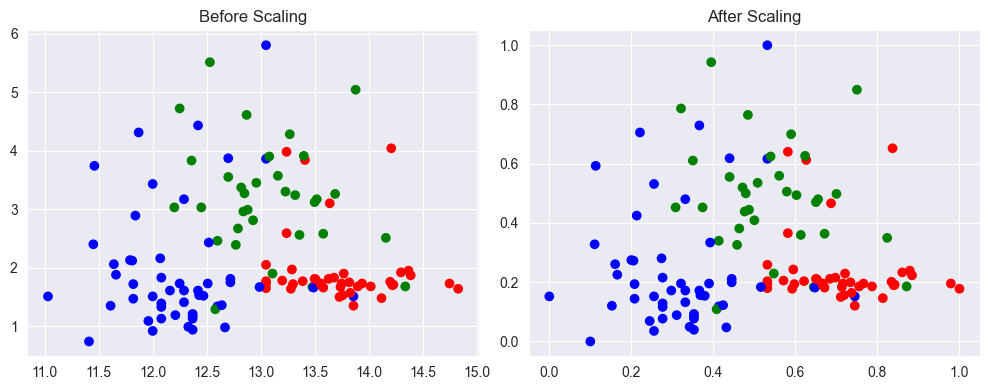

In [45]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(10,4))

ax1.scatter(X_train['Alcohol'], X_train['Malic_acid'], c=y_train.map(colorMap))
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic_acid'], c=y_train.map(colorMap))
ax2.set_title("After Scaling")
fig.tight_layout()
fig.show()

C:\Users\DSingh\AppData\Local\Temp\ipykernel_8392\970319004.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


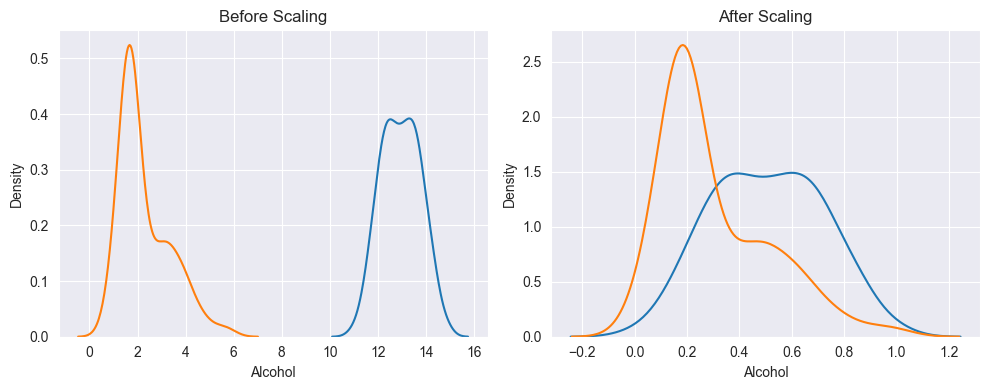

In [48]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(10,4))

sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic_acid'], ax=ax1)
ax1.set_title("Before Scaling")

sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic_acid'], ax=ax2)
ax2.set_title("After Scaling")

fig.tight_layout()
fig.show()

C:\Users\DSingh\AppData\Local\Temp\ipykernel_8392\4206185060.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


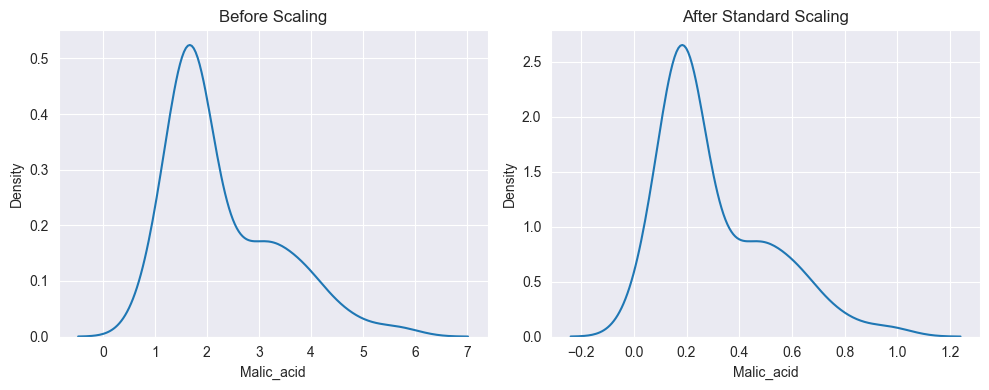

In [50]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(10,4))

#Before Scaling
sns.kdeplot(X_train['Malic_acid'], ax=ax1)
ax1.set_title("Before Scaling")


#After Scaling
sns.kdeplot(X_train_scaled['Malic_acid'], ax=ax2)
ax2.set_title("After Standard Scaling")

fig.tight_layout()
fig.show()

C:\Users\DSingh\AppData\Local\Temp\ipykernel_8392\13174952.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


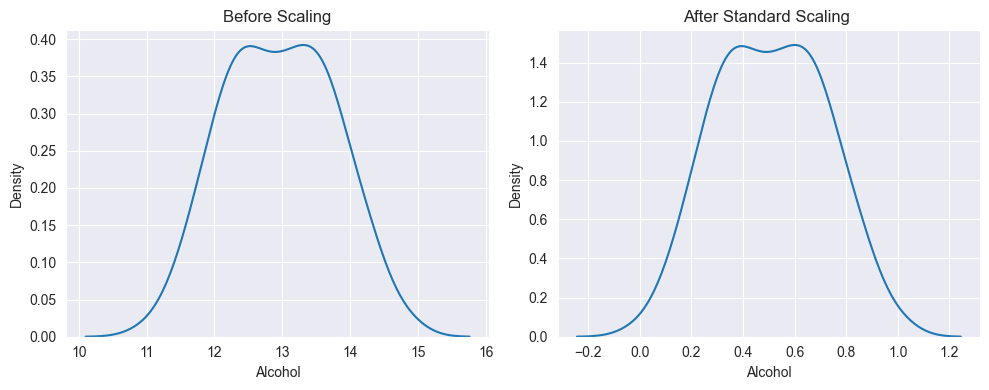

In [49]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(10,4))

#Before Scaling
sns.kdeplot(X_train['Alcohol'], ax=ax1)
ax1.set_title("Before Scaling")

#After Scaling
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
ax2.set_title("After Standard Scaling ")

fig.tight_layout()
fig.show()